In [22]:
import numpy as np
from matplotlib import pyplot as plt
import time as timing
import os

#from Edited_Photons_for_any_TTBIN import Photons
import random
import math
from numba import jit
from scipy.stats import poisson
import pandas as pd
import sklearn


- The denoising process for raman and g2 are similar - extend exposure times and compare SNR for each
- Perform L2 normalization
- Subtract minimum value from noisy signal from high and noisy signal

Example Spectra: https://www.kaggle.com/datasets/andriitrelin/cells-raman-spectra/data

In [4]:
example_spec = pd.read_csv('(COOH)2.csv')
example_shift_scale = np.linspace(100, 4278, 2090)
example_intensity_data = example_spec.iloc[1,:].values 

Text(0.5, 1.0, 'Example Raman Spectra: Melanoma Tissue Cell')

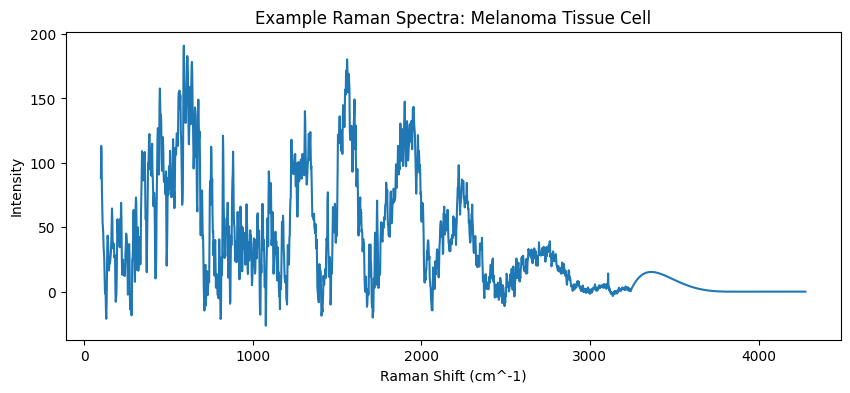

In [12]:
plt.figure(figsize=(10,4))
plt.plot(example_shift_scale,example_intensity_data)
plt.xlabel("Raman Shift (cm^-1)")
plt.ylabel("Intensity")
plt.title("Example Raman Spectra: Melanoma Tissue Cell")

Training Dataset: Use truth data as Raman Spectra collected with large exposure time (~500 ms). Use a mixed Poisson-Gaussian noise model to synthetically add noise onto these clean signal for training.

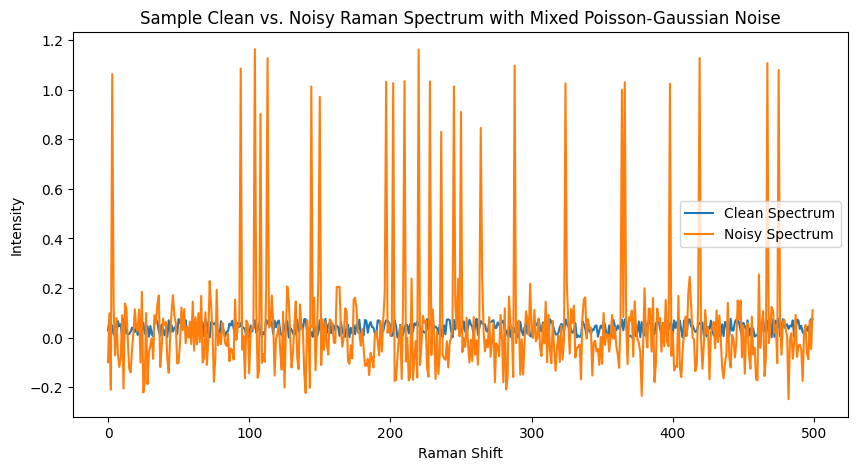

In [30]:
from sklearn.preprocessing import normalize
# Load or generate clean Raman spectra data
# For demonstration, let's create synthetic clean data
num_samples = 1000
num_features = 500

np.random.seed(42)  # For reproducibility

clean_spectra = np.random.rand(num_samples, num_features)  # Synthetic clean data

# Normalize the clean spectra using the L2 norm
clean_spectra_normalized = normalize(clean_spectra, norm='l2', axis=1)

# Define the noise parameters
mean_noise = 0
std_dev_noise = 0.1

def add_poisson_gaussian_noise(spectra, std_dev_noise):
    # Apply Poisson noise
    poisson_noisy_spectra = np.random.poisson(spectra)
    
    # Apply Gaussian noise
    gaussian_noise = np.random.normal(mean_noise, std_dev_noise, spectra.shape)
    
    noisy_spectra = poisson_noisy_spectra + gaussian_noise
    return noisy_spectra

def add_gaussian_noise(spectra, std_dev_noise):
    # Apply Gaussian noise
    gaussian_noise = np.random.normal(mean_noise, std_dev_noise, spectra.shape)

    return gaussian_noise

# Add mixed Poisson-Gaussian noise to the clean Raman spectra
noisy_spectra = add_poisson_gaussian_noise(clean_spectra_normalized, std_dev_noise)

# Add Gaussian noise to the clean Raman spectra
#noisy_spectra = add_gaussian_noise(clean_spectra, std_dev_noise)

# Plot a sample of clean and noisy spectra for comparison
plt.figure(figsize=(10, 5))
plt.plot(clean_spectra_normalized[0], label='Clean Spectrum')
plt.plot(noisy_spectra[0], label='Noisy Spectrum')
plt.legend()
plt.title('Sample Clean vs. Noisy Raman Spectrum with Mixed Poisson-Gaussian Noise')
plt.xlabel('Raman Shift')
plt.ylabel('Intensity')
plt.show()